In [1]:
import json
import pandas as pd


In [2]:
#Subset the number of lines (e.g. reading first 10,000 lines here)
N = 30000
with open('yelp_academic_dataset_business.json', 'rb') as datafile:
    dataSubset = [next(datafile) for x in range(N)]

In [3]:
parsed = json.loads(dataSubset[0]) #[0] gives the first element
print(json.dumps(parsed, indent=4, sort_keys=True))

{
    "address": "2818 E Camino Acequia Drive",
    "attributes": {
        "GoodForKids": "False"
    },
    "business_id": "1SWheh84yJXfytovILXOAQ",
    "categories": "Golf, Active Life",
    "city": "Phoenix",
    "hours": null,
    "is_open": 0,
    "latitude": 33.5221425,
    "longitude": -112.0184807,
    "name": "Arizona Biltmore Golf Club",
    "postal_code": "85016",
    "review_count": 5,
    "stars": 3.0,
    "state": "AZ"
}


In [4]:
processedData = "[" + ','.join([d.strip().decode('UTF-8') for d in dataSubset]) + "]"

In [5]:
# now, load it into pandas (N number of rows)
dfData = pd.read_json(processedData)
dfData.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [6]:
dfData.to_csv("yelpBusinesses.csv",index=False)


In [7]:
dfRead=pd.read_csv("yelpBusinesses.csv",encoding="ISO-8859-1")
dfRead.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,NaN,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [8]:
dfData.dropna(axis=0)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
5,68dUKd8_8liJ7in4aWOSEA,The UPS Store,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd",Mississauga,ON,L5V 0B1,43.599475,-79.711584,2.5,3,1,"{'BusinessParking': '{'garage': False, 'street...","Shipping Centers, Couriers & Delivery Services...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ..."
7,gbQN7vr_caG_A1ugSmGhWg,Supercuts,"4545 E Tropicana Rd Ste 8, Tropicana",Las Vegas,NV,89121,36.099872,-115.074574,3.5,3,1,"{'RestaurantsPriceRange2': '3', 'GoodForKids':...","Hair Salons, Hair Stylists, Barbers, Men's Hai...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,zZtLiZ4jeGTQ_E_ui22NRg,Mint Museum of Craft & Design,220 N Tryon St,Charlotte,NC,28202,35.228281,-80.840985,2.5,3,0,{'GoodForKids': 'False'},"Arts & Entertainment, Museums","{'Tuesday': '10:0-21:0', 'Wednesday': '10:0-18..."
29994,Jkjq2-DybUZdF0RWY8_cZg,Hangry Burger,435 Yonge Street,Toronto,ON,M5B 1T3,43.660918,-79.382577,3.5,19,0,"{'RestaurantsTableService': 'False', 'DriveThr...","Burgers, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
29995,9x7LXcLO87GiwMMduqFcCQ,GetGo Café & Market,1501 Travelers Pt,Avon,OH,44011,41.466504,-82.023502,4.0,12,1,"{'RestaurantsTakeOut': 'True', 'Caters': 'Fals...","Food, Automotive, Gas Stations, Convenience St...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
29996,HOP5savToH5hGgKjJA1hlA,Klutts Property Management,1433 Emerywood Dr,Charlotte,NC,28210,35.156190,-80.874013,2.0,9,1,{'BusinessAcceptsCreditCards': 'True'},"Home Services, Property Management, Real Estat...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."


In [9]:
x=dfData["stars"].value_counts()
x=x.sort_index()
x.rename(columns={'stars':'value_counts'})
x.index.name= 'stars'
print(x)

stars
1.0     710
1.5     796
2.0    1789
2.5    2911
3.0    4102
3.5    5448
4.0    5640
4.5    4187
5.0    4417
Name: stars, dtype: int64


In [10]:
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns

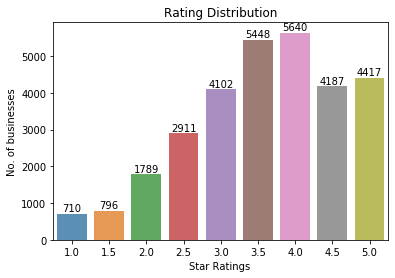

In [11]:
ax=sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Rating Distribution")
plt.ylabel('No. of businesses')
plt.xlabel('Star Ratings ')

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


In [12]:
y=dfData["city"].value_counts()
y=y.sort_index()

y.rename(columns={'city':'value_counts'})
y.index.name= 'city'
print(y)


city
Ahwatukee     2
Airdrie      25
Ajax         37
Akron        78
Alberta       1
             ..
las Vegas     1
las vegas     1
phoenix       1
verdun        1
​Chandler     1
Name: city, Length: 569, dtype: int64


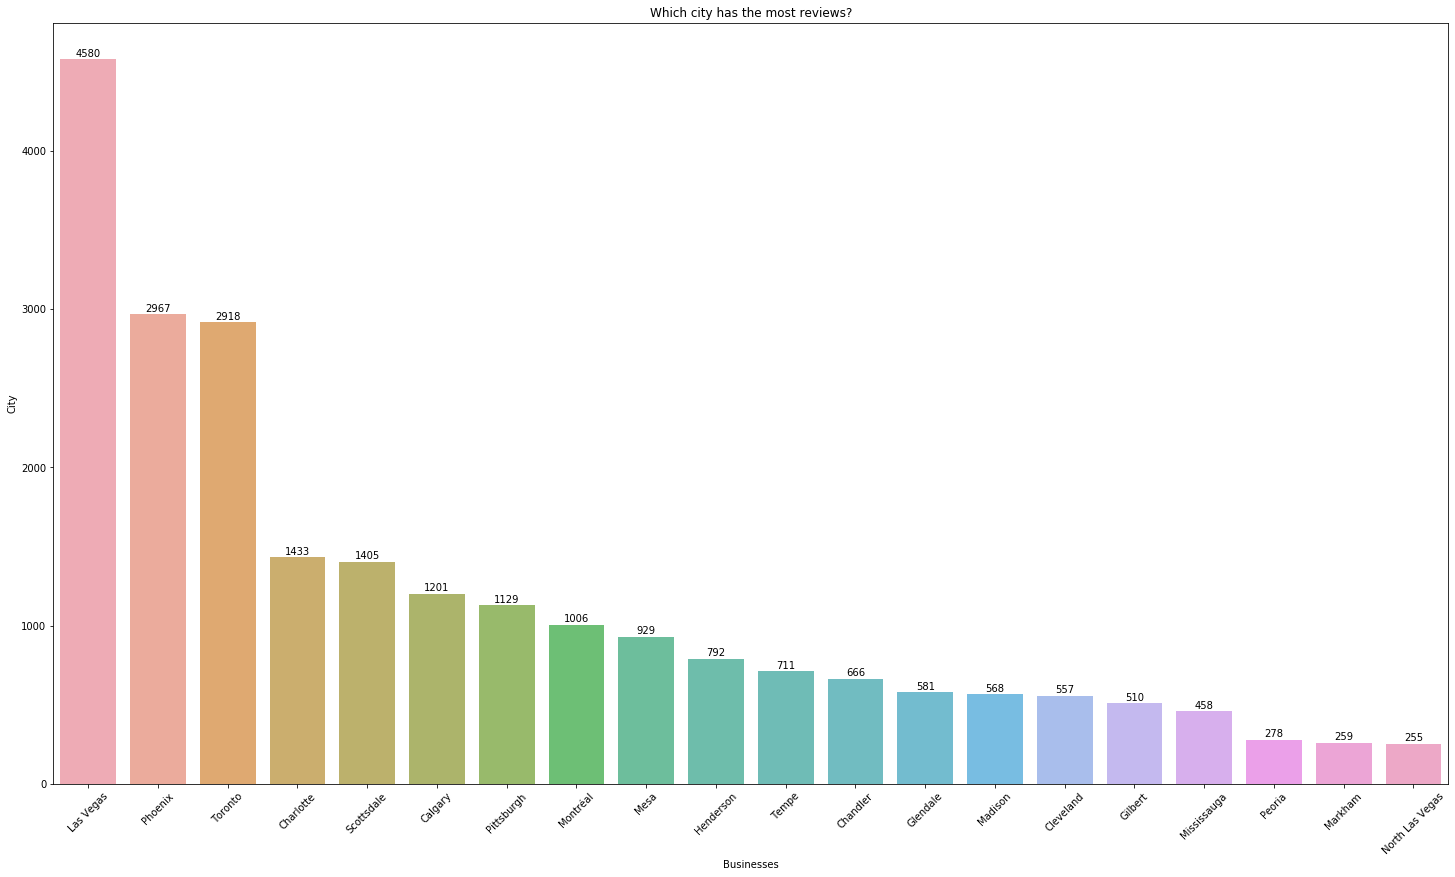

In [13]:
y=dfData['city'].value_counts()
x=y.sort_values(ascending=False)
plt.figure(figsize=(25,14))
x=x.iloc[0:20]
ay=sns.barplot(x.index, x.values, alpha=0.8)

plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xlabel('Businesses')
plt.ylabel('City')
bars = ay.patches
tags = x.values
for bar, tag in zip(bars, tags):
    ay.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, tag, ha='center', va='bottom')

plt.show()

In [14]:
dfData=dfData.dropna()

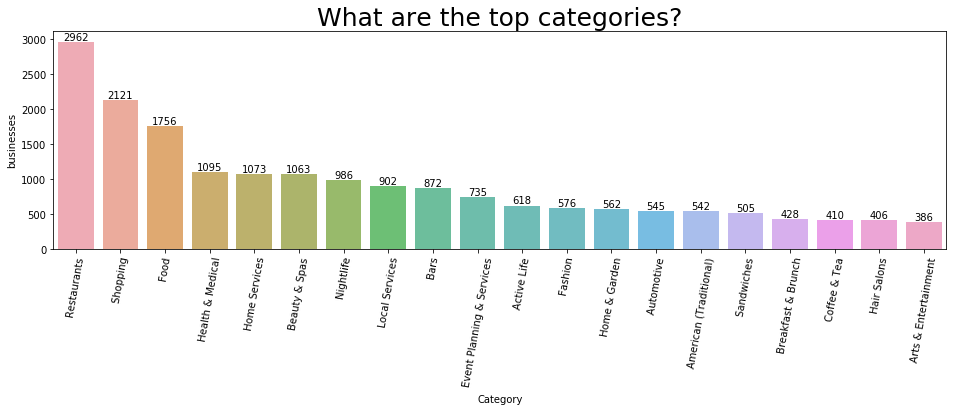

In [15]:
business_cats=' '.join(dfData['categories'])

cats=pd.DataFrame(business_cats.split(','),columns=['category'])
a=cats.category.value_counts()
a=a.sort_values(ascending=False)
a=a.iloc[0:20]
#a=a.sample(n=20, random_state=16)


plt.figure(figsize=(16,4))
aa = sns.barplot(a.index, a.values, alpha=0.8)
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('businesses')
plt.xlabel('Category')

#adding the text labels
rects = aa.patches
labels = a.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    aa.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.show()


In [18]:
#businesses mapped along with names
import folium
usa_biz = folium.Map(location=[35.2271,-80.8431],zoom_start=10)

In [19]:
biz = folium.map.FeatureGroup()
lats=dfData['latitude'].tolist()
longs=dfData['longitude'].tolist()
names=dfData['name'].tolist()
for i in range(1000):
    biz.add_child(folium.CircleMarker([lats[i],longs[i]], tiles='OpenStreetMap', radius =4, color="red", fill_color="Red"))
    folium.Marker([lats[i],longs[i]],popup=names[i]).add_to(usa_biz)

In [20]:
usa_biz.add_child(biz)
#folium.Marker([35.262558,-81.133545]).add_to(vegas_map)
usa_biz

In [21]:
dfSalons=dfData[dfData['categories'].str.contains('Salons',regex=False)]
dfSalons.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
7,gbQN7vr_caG_A1ugSmGhWg,Supercuts,"4545 E Tropicana Rd Ste 8, Tropicana",Las Vegas,NV,89121,36.099872,-115.074574,3.5,3,1,"{'RestaurantsPriceRange2': '3', 'GoodForKids':...","Hair Salons, Hair Stylists, Barbers, Men's Hai...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
8,Y6iyemLX_oylRpnr38vgMA,Vita Bella Fine Day Spa,5940 W Union Hills Dr,Glendale,AZ,85308,33.654815,-112.188568,5.0,8,0,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Nail Salons, Beauty & Spas, Day Spas","{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18..."
9,4GBVPIYRvzGh4K4TkRQ_rw,Options Salon & Spa,21689 Lorain Rd,Fairview Park,OH,44126,41.440825,-81.854097,4.5,8,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Beauty & Spas, Nail Salons, Day Spas, Massage","{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0..."
16,giC3pVVFxCRR89rApqklyw,Knot Salon,"4848 E Cactus Rd, Ste 100",Scottsdale,AZ,85254,33.600071,-111.977371,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Hair Stylists, Beauty & Spas, Hair Salons, Men...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '..."
59,0KlYc--jcw4EOYdPS8CDQg,Cookie Cutters Haircuts for Kids,"14130 Rivergate Pkwy, Ste 200",Charlotte,NC,28273,35.102490,-80.985769,4.0,7,1,"{'BikeParking': 'False', 'BusinessAcceptsBitco...","Beauty & Spas, Hair Salons, Kids Hair Salons","{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ..."


In [22]:
#salons mapped in usa

usa_map = folium.Map(location=[35.2271,-80.8431],zoom_start=4)
usa = folium.map.FeatureGroup()
lats=dfSalons['latitude'].tolist()
longs=dfSalons['longitude'].tolist()
#names1=dfSalons['name'].tolist()

#rests=dfRestaurants['categories'].tolist()
Salons=dfSalons['categories'].tolist()
names1=dfSalons['name'].tolist()

for i in range(1000):
    #if 'Restaurants' in rests[i]:
        usa.add_child(folium.CircleMarker([lats[i],longs[i]], tiles='OpenStreetMap', radius =4, color="red", fill_color="Red"))
        #folium.Marker([lats[i],longs[i]],popup=names1[i]).add_to(usa_map)
        folium.Marker([lats[i],longs[i]], popup=names1[i]).add_to(usa_map)
usa_map.add_child(usa)
usa_map

In [23]:
usa_map = folium.Map(location=[35.2271,-80.8431],zoom_start=4)
usa = folium.map.FeatureGroup()
lats=dfData['latitude'].tolist()
longs=dfData['longitude'].tolist()


In [24]:
#bussiness in heatmap
import numpy as np
from folium import plugins
from folium.plugins import HeatMap
hotness_map = folium.Map(location=[35.2271,-80.8431],tiles="Mapbox Bright",zoom_start=10)
hotness = folium.map.FeatureGroup()
lats = dfData['latitude'].tolist()
longs = dfData['longitude'].tolist()
data = dfData[['latitude','longitude']].values.tolist()
hm = plugins.HeatMap(data, radius = 20, min_opacity = 0.1, max_val = 100,gradient={.1: 'blue', .3: 'lime', .5: 'red'})
hm.add_to(hotness_map)
hotness_map

In [25]:
dfRestaurants=dfData[dfData['attributes'].str.contains('RestaurantsPriceRange2',regex=False)]
dfRestaurants=dfRestaurants[dfRestaurants['categories'].str.contains('Restaurants',regex=False)]
dfRestaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,saljMuo0eSMWy-C7yjKaRA,Ray's Country Smokehouse & Grill,219 S Broad St,Gastonia,NC,28052,35.261129,-81.178972,4.0,40,1,"{'BikeParking': 'True', 'RestaurantsAttire': '...","Food, Smokehouse, American (Traditional), Rest...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
29992,v9lgBpntXoaJJxEwuadBsQ,Starbucks,"10 Lower Spadina Avenue, Suite 101",Toronto,ON,M5V 2Z2,43.637840,-79.392353,3.5,7,1,"{'RestaurantsPriceRange2': '1', 'WiFi': ''free...","Coffee & Tea, Restaurants, Breakfast & Brunch,...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
29994,Jkjq2-DybUZdF0RWY8_cZg,Hangry Burger,435 Yonge Street,Toronto,ON,M5B 1T3,43.660918,-79.382577,3.5,19,0,"{'RestaurantsTableService': 'False', 'DriveThr...","Burgers, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
29995,9x7LXcLO87GiwMMduqFcCQ,GetGo Café & Market,1501 Travelers Pt,Avon,OH,44011,41.466504,-82.023502,4.0,12,1,"{'RestaurantsTakeOut': 'True', 'Caters': 'Fals...","Food, Automotive, Gas Stations, Convenience St...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [26]:
business_cats=' '.join(dfRestaurants['categories'])
cats=pd.DataFrame(business_cats.split(','),columns=['category'])
a=cats.category.value_counts()
cats=cats[cats.isin(a.index[a>=20]).values]
z = cats['category'].unique()

In [27]:
z

array([' Restaurants', ' Dim Sum', ' Imported Food', ' Food', ' Chinese',
       ' Ethnic Food', ' Japanese Restaurants', ' Breakfast & Brunch',
       ' Mexican', ' Tex-Mex', ' Pizza', ' Bars', ' Fast Food',
       ' Nightlife', ' Vegan', ' Tapas Bars', ' Southern', ' Italian',
       ' American (Traditional)', ' American (New)', ' Seafood',
       ' Steakhouses', ' Restaurants Restaurants', ' Modern European',
       ' Hookah Bars', ' Middle Eastern', ' Beer', ' Wine & Spirits',
       ' Lounges', ' Sushi Bars', ' Restaurants American (Traditional)',
       ' Restaurants Chinese', ' Restaurants Nightlife', ' Japanese',
       ' Desserts', ' Bakeries', ' Cafes', ' Mediterranean',
       ' Food Restaurants', ' Pubs', ' Burgers', ' Salad',
       ' Event Planning & Services', ' Venues & Event Spaces',
       ' Ice Cream & Frozen Yogurt', ' Wine Bars', ' Caterers',
       ' Asian Fusion', ' Specialty Food', ' Sandwiches', ' Hot Dogs',
       ' Vegetarian', ' Restaurants Burgers', ' Resta

In [28]:
z = np.delete(z,np.argwhere(z ==' Restaurants'))
z = np.delete(z,np.argwhere(z ==' Food'))
z.shape


(126,)

In [29]:
data=[]
for category in z:
    priceCount=0
    totalCount=0
    revCount=0
    for index, row in dfRestaurants.iterrows():
        r=json.dumps(row['attributes'])
        rd=json.loads(r)
        if category in str(row['categories']) and rd['RestaurantsPriceRange2']!='None':
            priceCount+=int(rd['RestaurantsPriceRange2'])
            totalCount+=1
            revCount+=row['review_count']
    if(totalCount!=0):
        data.append([category,revCount/totalCount,priceCount/totalCount,totalCount])
print(data)        

[[' Dim Sum', 207.6, 1.8857142857142857, 35], [' Imported Food', 41.11538461538461, 1.6923076923076923, 26], [' Chinese', 93.46503496503496, 1.5769230769230769, 286], [' Ethnic Food', 69.8314606741573, 1.5393258426966292, 89], [' Breakfast & Brunch', 147.34690265486725, 1.6265486725663716, 565], [' Mexican', 121.91111111111111, 1.4638888888888888, 360], [' Tex-Mex', 83.13698630136986, 1.4246575342465753, 73], [' Pizza', 81.09387755102041, 1.6714285714285715, 490], [' Bars', 126.99234303215927, 1.9663093415007658, 1306], [' Fast Food', 45.65377176015474, 1.2011605415860735, 517], [' Nightlife', 128.75843307943416, 2.0087051142546244, 919], [' Vegan', 141.0120481927711, 1.7228915662650603, 83], [' Tapas Bars', 92.0, 2.3076923076923075, 39], [' Southern', 244.5, 1.8, 50], [' Italian', 113.40759493670886, 1.9645569620253165, 395], [' American (Traditional)', 133.3328651685393, 1.7640449438202248, 712], [' American (New)', 186.16432865731463, 1.9158316633266532, 499], [' Seafood', 142.00775

In [30]:
revDf=pd.DataFrame(data,columns=['Category','AvgReview','AvgPrice', 'TotalRest'])

In [34]:
#An insight to find most profitable restaurant categories
import plotly.plotly as py
import cufflinks as cf
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
cf.set_config_file(offline=True, world_readable=True, theme='pearl')
revDf.iplot(kind='bubble', x='AvgReview', y='AvgPrice', size='TotalRest', text='TotalRest', categories='Category',
             xTitle='Popularity', yTitle='Average Price',
             filename='cufflinks/simple-bubble-chart')